<a href="https://colab.research.google.com/github/D1emonk/My-repo/blob/dev/lesson16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Линейная регрессия

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Загрузка данных
diabetes = datasets.load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

In [ ]:
print(data.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [ ]:
data['bmi']

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
...,...
437,0.019662
438,-0.015906
439,-0.015906
440,0.039062


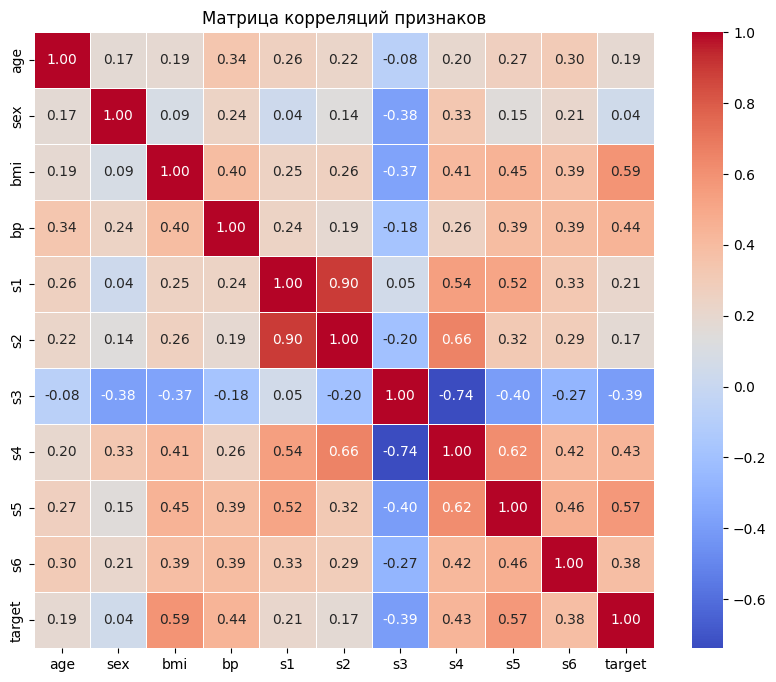

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций признаков')
plt.show()

In [3]:
# Выбор одного признака для линейной регрессии
X = diabetes.data[:, 2].reshape(-1, 1)  # Берем только один признак
Y = diabetes.target
print(X.shape)

(442, 1)


In [4]:
# Разделение на обучающую и тестовую выборку
X_train, X_test = X[:-20], X[-20:]
Y_train, Y_test = Y[:-20], Y[-20:]

In [5]:
# Добавление единичного столбца для учета свободного коэффициента
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

In [20]:
# Инициализация параметров
theta = np.random.randn(2, 1)
learning_rate = 0.1
n_iterations = 1000
m = len(X_train)

In [21]:
# Градиентный спуск
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y_train.reshape(-1, 1))
    theta -= learning_rate * gradients

In [22]:
# Функция для предсказаний
def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Добавляем единичный столбец
    return X_b.dot(theta)

In [23]:
# Предсказания на тестовых данных
Y_pred = predict(X_test, theta)
Y_pred

array([[179.96695137],
       [139.58150279],
       [156.99541181],
       [139.21099409],
       [141.4340463 ],
       [155.1428683 ],
       [183.6720384 ],
       [141.80455501],
       [133.65336355],
       [142.54557241],
       [172.18626862],
       [132.54183744],
       [153.66083349],
       [145.13913333],
       [127.72522431],
       [159.95948143],
       [147.73269425],
       [147.73269425],
       [166.62863808],
       [128.09573301]])

In [27]:
# Вычисление метрик
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)

print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")

Средняя абсолютная ошибка (MAE): 54.94
Среднеквадратичная ошибка (MSE): 4008.35


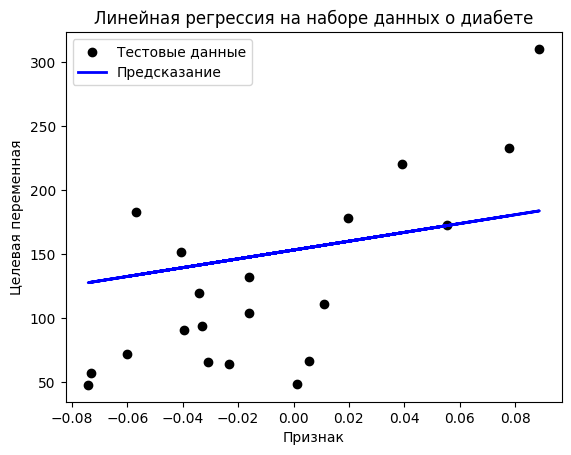

In [24]:
# Визуализация
plt.scatter(X_test, Y_test, color='black', label='Тестовые данные')
plt.plot(X_test, Y_pred, color='blue', linewidth=2, label='Предсказание')
plt.xlabel('Признак')
plt.ylabel('Целевая переменная')
plt.legend()
plt.title('Линейная регрессия на наборе данных о диабете')
plt.show()

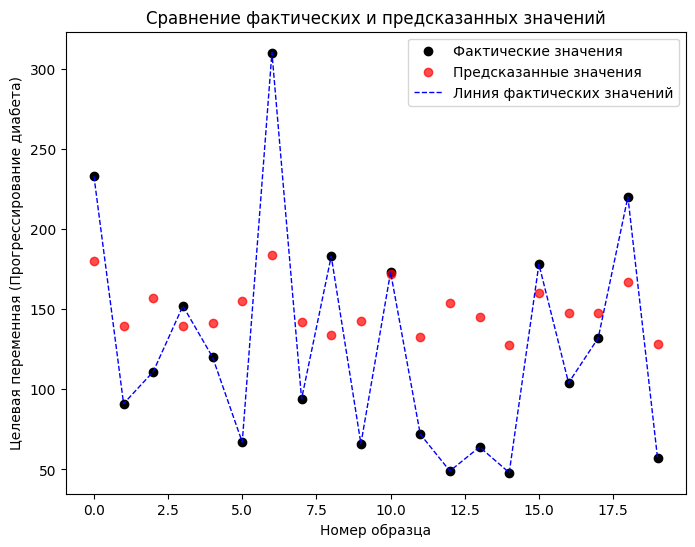

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(Y_test)), Y_test, color='black', label="Фактические значения")
plt.scatter(range(len(Y_pred)), Y_pred, color='red', label="Предсказанные значения", alpha=0.7)
plt.plot(range(len(Y_test)), Y_test, color='blue', linestyle='dashed', linewidth=1, label="Линия фактических значений")
plt.xlabel("Номер образца")
plt.ylabel("Целевая переменная (Прогрессирование диабета)")
plt.legend()
plt.title("Сравнение фактических и предсказанных значений")
plt.show()

<h1> Логическая регрессия

In [47]:
# 1. Загрузка данных и подготовка
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
# Оставляем только два класса (Setosa и Versicolor)
data = data[data['target'] <= 1]

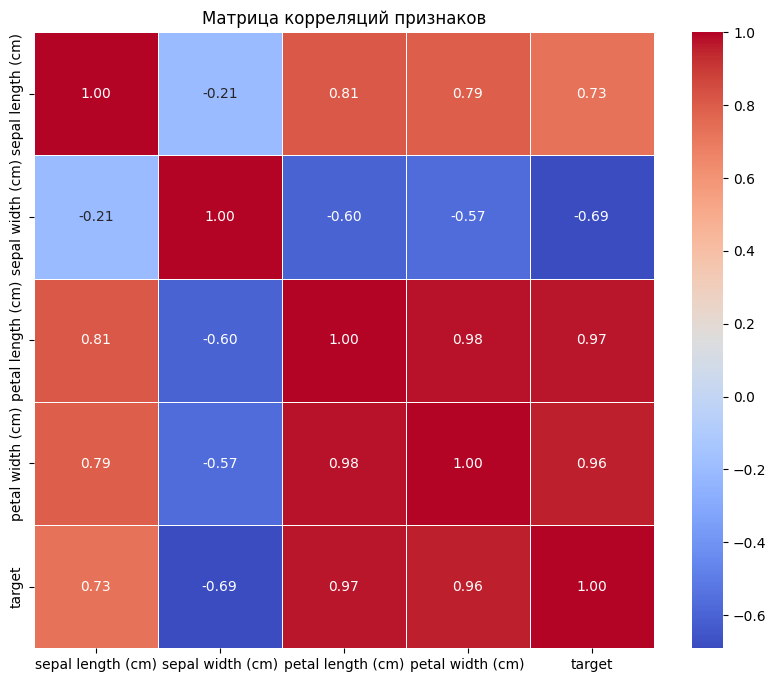

In [49]:
# Матрица корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций признаков')
plt.show()

In [50]:
# Выбор признаков и подготовка данных
X = data[['petal length (cm)', 'petal width (cm)']].values  # Два признака для визуализации
Y = data['target'].values

In [51]:
# Разделение на обучающую и тестовую выборки
X_train, X_test = X[:-20], X[-20:]
Y_train, Y_test = Y[:-20], Y[-20:]

In [52]:
# Нормализация данных
mean_train = X_train.mean(axis=0)
std_train = X_train.std(axis=0)
X_train = (X_train - mean_train) / std_train
X_test = (X_test - mean_train) / std_train

In [53]:
# Добавление единичного столбца
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [54]:
# Сигмоидная функция
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [67]:
# Инициализация параметров
np.random.seed(42)
theta = np.random.randn(X_train_b.shape[1])

In [56]:
# Параметры обучения
learning_rate = 0.1
n_iterations = 1000
m = len(X_train)

In [57]:
# Градиентный спуск
loss_history = []
for iteration in range(n_iterations):
    z = X_train_b.dot(theta)
    y_pred = sigmoid(z)
    error = y_pred - Y_train
    gradients = (1/m) * X_train_b.T.dot(error)
    theta -= learning_rate * gradients
    loss = -np.mean(Y_train*np.log(y_pred) + (1-Y_train)*np.log(1-y_pred))
    loss_history.append(loss)

In [58]:
# Функция предсказания
def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return (sigmoid(X_b.dot(theta)) >= 0.5).astype(int)

In [59]:
# Оценка точности
train_accuracy = np.mean(predict(X_train, theta) == Y_train)
test_accuracy = np.mean(predict(X_test, theta) == Y_test)

print(f"Точность на обучающих данных: {train_accuracy:.2f}")
print(f"Точность на тестовых данных: {test_accuracy:.2f}")

Точность на обучающих данных: 1.00
Точность на тестовых данных: 1.00


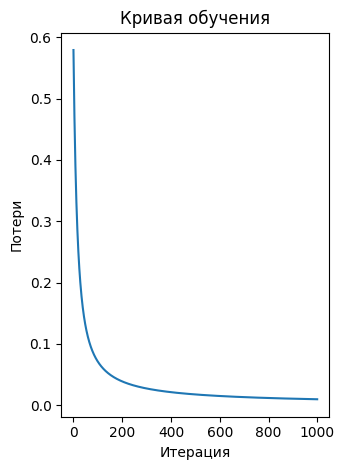

In [62]:
# График потерь
plt.subplot(1, 2, 2)
plt.plot(loss_history)
plt.xlabel('Итерация')
plt.ylabel('Потери')
plt.title('Кривая обучения')

plt.tight_layout()
plt.show()

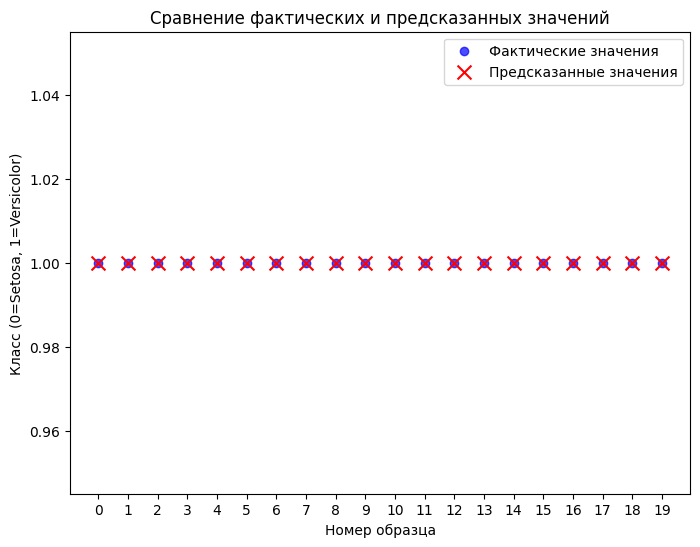

In [63]:
# Сравнение предсказаний
plt.figure(figsize=(8, 6))
plt.scatter(range(len(Y_test)), Y_test, color='blue', label="Фактические значения", alpha=0.7)
plt.scatter(range(len(Y_test)), predict(X_test, theta), color='red',
            marker='x', s=100, label="Предсказанные значения")
plt.xticks(range(len(Y_test)))
plt.xlabel("Номер образца")
plt.ylabel("Класс (0=Setosa, 1=Versicolor)")
plt.legend()
plt.title("Сравнение фактических и предсказанных значений")
plt.show()